**Dot Density Map**

In [209]:
import geopandas as gpd

linkGit='https://github.com/DACSS690D-SpatialAnalysis/Homework1/raw/refs/heads/main/'
linkWorldIndicators='worldindicators.json'

fullLinkWorldIndicators=linkGit+linkWorldIndicators
worldIndicators=gpd.read_file(fullLinkWorldIndicators)

worldIndicators.head(50)

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
0,ANTIGUA AND BARBUDA,AG,ATG,CENTRAL AMERICA AND THE CARIBBEAN,54.4,729000,443,4,102634,184000,"MULTIPOLYGON (((-61.73889 17.54055, -61.75195 ..."
1,AFGHANISTAN,AF,AFG,SOUTH ASIA,105.0,7893000,652230,68,40121552,23000000,"MULTIPOLYGON (((61.27656 35.60725, 61.29638 35..."
2,ALGERIA,DZ,DZA,AFRICA,75.4,151633000,2381740,95,47022473,51500000,"MULTIPOLYGON (((-5.15213 30.18047, -5.13917 30..."
3,AZERBAIJAN,AZ,AZE,MIDDLE EAST,73.2,35389000,86600,32,10650239,11000000,"MULTIPOLYGON (((46.54037 38.87559, 46.49554 38..."
4,ALBANIA,AL,ALB,EUROPE,58.9,3794000,28748,3,3107100,2610000,"MULTIPOLYGON (((20.79192 40.43154, 20.78722 40..."
5,ARMENIA,AM,ARM,MIDDLE EAST,66.7,6354000,29743,11,2976765,3960000,"MULTIPOLYGON (((46.54037 38.87559, 46.51639 38..."
6,ANGOLA,AO,AGO,AFRICA,87.8,19362000,1246700,107,37202061,25700000,"MULTIPOLYGON (((13.09139 -4.63306, 13.09264 -4..."
7,ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
8,AUSTRALIA,AU,AUS,AUSTRALIA AND OCEANIA,19.7,417870000,7741220,2257,26768598,29100000,"MULTIPOLYGON (((142.27997 -10.26556, 142.21053..."
9,AUSTRIA,AT,AUT,EUROPE,25.0,65540000,83871,62,8967982,11100000,"MULTIPOLYGON (((10.47124 46.87135, 10.48821 46..."


In [210]:
southAmerica=worldIndicators[worldIndicators.region=='SOUTH AMERICA']

southAmerica.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [211]:
southAmerica.to_crs(32721).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [212]:
southAmerica.to_crs(32721).centroid

,0
7,POINT (-209034.328 6127726.445)
18,POINT (-324431.397 8139959.317)
22,POINT (930089.124 8822298.509)
34,POINT (-745661.919 5905367.74)
37,POINT (-1314246.797 10450352.008)
47,POINT (-1999174.391 9830015.652)
67,POINT (281167.162 10529695.007)
116,POINT (620839.789 10456112.767)
119,POINT (352988.062 7431935.794)
120,POINT (-1449264.651 8955659.036)


In [213]:
print(southAmerica.mobiles.describe().to_string(float_format=lambda x: f'{x:.0f}'))

count          12
mean     41284583
std      60176428
min        856000
25%       7702500
50%      18500000
75%      46650000
max     213000000


In [214]:
(southAmerica.set_index("Country").mobiles / 500000).astype(int).sort_values()

,mobiles
Country,
GUYANA,1
SURINAME,1
URUGUAY,9
PARAGUAY,17
BOLIVIA,24
ECUADOR,36
VENEZUELA,37
CHILE,53
PERU,82


Create a map of dots

In [215]:
temporal_gdf=southAmerica.copy()
# the row names will be the country
temporal_gdf.set_index('Country',inplace=True)

# we have this now
temporal_gdf.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
Country,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,"MULTIPOLYGON (((-71.01648 -36.47591, -70.98195..."
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,"MULTIPOLYGON (((-62.19884 -20.47139, -62.26945..."
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,"MULTIPOLYGON (((-70.62862 -9.94849, -70.62889 ..."
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,"MULTIPOLYGON (((-73.61806 -51.6339, -73.60494 ..."
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,"MULTIPOLYGON (((-81.71306 12.49028, -81.72014 ..."


Creating "dots_per_country" column

In [216]:
# creating  column
temporal_gdf['dots_per_country'] = (southAmerica['mobiles'] / 500000).astype(int).values

# see
temporal_gdf['dots_per_country'].head(10)

,dots_per_country
Country,
ARGENTINA,125
BOLIVIA,24
BRAZIL,426
CHILE,53
COLOMBIA,174
ECUADOR,36
GUYANA,1
SURINAME,1
PARAGUAY,17


In [217]:
#find a random location for the dots to be placed on the map

# enter 'sample_points()'
temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123).head(10)

,sampled_points
Country,
ARGENTINA,"MULTIPOINT ((-73.07645 -50.02618), (-72.79046 ..."
BOLIVIA,"MULTIPOINT ((-67.64293 -18.76606), (-67.52156 ..."
BRAZIL,"MULTIPOINT ((-72.89475 -5.82655), (-72.14016 -..."
CHILE,"MULTIPOINT ((-73.71228 -40.2717), (-73.44517 -..."
COLOMBIA,"MULTIPOINT ((-78.37371 1.94403), (-78.32321 2...."
ECUADOR,"MULTIPOINT ((-91.16564 -0.33339), (-80.59021 -..."
GUYANA,POINT (-58.03317 1.58237)
SURINAME,POINT (-54.29927 2.98834)
PARAGUAY,"MULTIPOINT ((-62.19168 -20.96164), (-62.04329 ..."


In [218]:
# check to see that you created a 'geoseries'

type(temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123))

geopandas.geoseries.GeoSeries

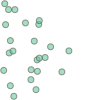

In [219]:
temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123).loc['BOLIVIA']

In [220]:
southAmerica_dots=gpd.GeoDataFrame(geometry=temporal_gdf.sample_points(size=temporal_gdf['dots_per_country'],rng=123))
southAmerica_dots.head(10)

,geometry
Country,
ARGENTINA,"MULTIPOINT ((-73.07645 -50.02618), (-72.79046 ..."
BOLIVIA,"MULTIPOINT ((-67.64293 -18.76606), (-67.52156 ..."
BRAZIL,"MULTIPOINT ((-72.89475 -5.82655), (-72.14016 -..."
CHILE,"MULTIPOINT ((-73.71228 -40.2717), (-73.44517 -..."
COLOMBIA,"MULTIPOINT ((-78.37371 1.94403), (-78.32321 2...."
ECUADOR,"MULTIPOINT ((-91.16564 -0.33339), (-80.59021 -..."
GUYANA,POINT (-58.03317 1.58237)
SURINAME,POINT (-54.29927 2.98834)
PARAGUAY,"MULTIPOINT ((-62.19168 -20.96164), (-62.04329 ..."


In [221]:
southAmerica_dots.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 12 entries, ARGENTINA to VENEZUELA
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  12 non-null     geometry
dtypes: geometry(1)
memory usage: 492.0+ bytes


<Axes: >

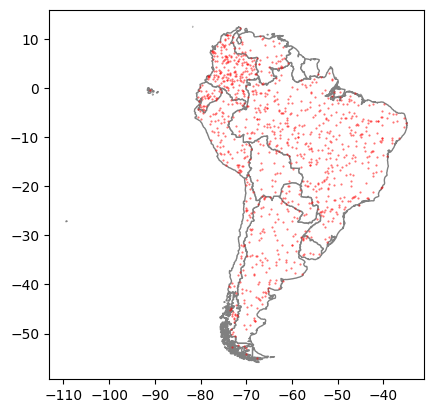

In [222]:
base=southAmerica.plot(facecolor="white",
               edgecolor='grey')
southAmerica_dots.plot(markersize=0.25, color='red',ax=base, alpha=0.6)

In [223]:
southAmerica_32721=southAmerica.to_crs(32721)
southAmerica_dots_32721=southAmerica_dots.to_crs(32721)

<Axes: >

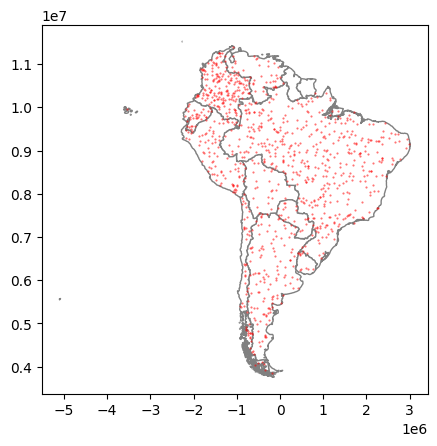

In [224]:
base=southAmerica_32721.plot(facecolor="white",
               edgecolor='grey')
southAmerica_dots_32721.plot(markersize=0.25, color='red',ax=base, alpha=0.6)

In [225]:
# split multipoints using explode()

southAmerica_dots_32721=southAmerica_dots_32721.explode(ignore_index=True)

type(southAmerica_dots_32721)

geopandas.geodataframe.GeoDataFrame

**Proportional Symbols Map**

In [226]:
# scale variable to determine size

##what about square root scaling
import numpy as np

max_size=75
min_size=1
scaled_sizes = np.sqrt(
    (southAmerica_32721.mobiles - southAmerica_32721.mobiles.min()) / (southAmerica.mobiles.max() - southAmerica.mobiles.min())
) * (max_size-1) + min_size

scaled_sizes.sort_values()

,mobiles
67,1.000000
116,2.852858
159,11.089852
119,15.202116
18,17.960431
47,22.158797
161,22.521670
34,26.828323
120,33.310479
7,40.954447


In [227]:
southAmerica_32721_symbols = southAmerica_32721.copy()
southAmerica_32721_symbols.set_index('Country',inplace=True)

#this is just a copy (new index names)
southAmerica_32721_symbols.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry
Country,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,"MULTIPOLYGON (((-759270.665 5870625.155, -7560..."
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,"MULTIPOLYGON (((-42754.831 7727724.803, -49816..."
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,"MULTIPOLYGON (((-1007377.468 8868866.239, -100..."
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,"MULTIPOLYGON (((-646219.821 4147706.976, -6454..."
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,"MULTIPOLYGON (((-2264333.479 11515989.067, -22..."


In [228]:
# set the size of the symbol
southAmerica_32721_symbols['size']=scaled_sizes.values # notice .values!

In [229]:
# one symbol per polygon

# locations will have a new geometry:
southAmerica_32721_symbols['geometry'] = southAmerica_32721_symbols['geometry'].centroid

# see the geom is NOW a POINT
southAmerica_32721_symbols

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size
Country,,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,POINT (-209034.328 6127726.445),40.954447
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,POINT (-324431.397 8139959.317),17.960431
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,POINT (930089.124 8822298.509),75.000000
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,POINT (-745661.919 5905367.74),26.828323
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,POINT (-1314246.797 10450352.008),48.264474
ECUADOR,EC,ECU,SOUTH AMERICA,71.2,36051000,283561,317,18309984,18200000,POINT (-1999174.391 9830015.652),22.158797
GUYANA,GY,GUY,SOUTH AMERICA,68.2,2743000,214969,55,794099,856000,POINT (281167.162 10529695.007),1.000000
SURINAME,SR,SUR,SOUTH AMERICA,61.9,2372000,163820,55,646758,989000,POINT (620839.789 10456112.767),2.852858
PARAGUAY,PY,PRY,SOUTH AMERICA,67.0,7896000,406752,83,7522549,8670000,POINT (352988.062 7431935.794),15.202116


<Axes: >

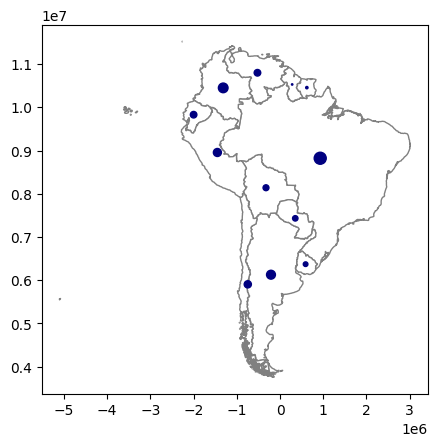

In [230]:
base=southAmerica_32721.plot(facecolor="white",
                      edgecolor='grey')
# Plot the centroids on top
southAmerica_32721_symbols.plot(
    ax=base,
    markersize=southAmerica_32721_symbols['size'],
    color='navy'
)

In [231]:
base=southAmerica_32721[southAmerica_32721.Country=="ECUADOR"].explore()
southAmerica_32721_symbols[southAmerica_32721_symbols.index=="ECUADOR"].explore(m=base,color="red")

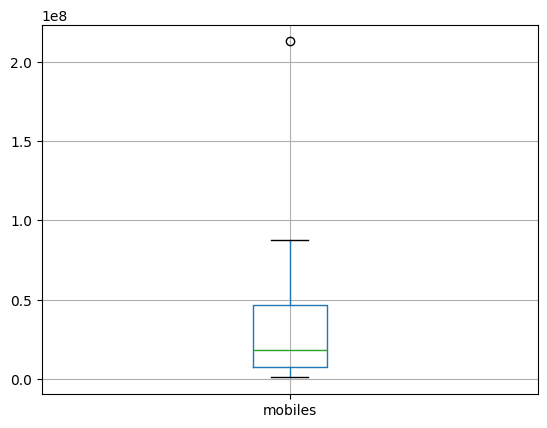

In [232]:
# check for outliers

boxplotInfo=southAmerica_32721.boxplot(column='mobiles',return_type="dict")

In [233]:
outliers=boxplotInfo['fliers'][0].get_ydata()
## see
outliers

southAmerica_32721_symbols[southAmerica_32721_symbols.mobiles.isin(outliers)].index

Index(['BRAZIL'], dtype='object', name='Country')

In [234]:
# outlier flag for Brazil

southAmerica_32721_symbols['mobiles_outlier']=southAmerica_32721_symbols.mobiles.isin(outliers)*1

## see
southAmerica_32721_symbols

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size,mobiles_outlier
Country,,,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,POINT (-209034.328 6127726.445),40.954447,0
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,POINT (-324431.397 8139959.317),17.960431,0
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,POINT (930089.124 8822298.509),75.000000,1
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,POINT (-745661.919 5905367.74),26.828323,0
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,POINT (-1314246.797 10450352.008),48.264474,0
ECUADOR,EC,ECU,SOUTH AMERICA,71.2,36051000,283561,317,18309984,18200000,POINT (-1999174.391 9830015.652),22.158797,0
GUYANA,GY,GUY,SOUTH AMERICA,68.2,2743000,214969,55,794099,856000,POINT (281167.162 10529695.007),1.000000,0
SURINAME,SR,SUR,SOUTH AMERICA,61.9,2372000,163820,55,646758,989000,POINT (620839.789 10456112.767),2.852858,0
PARAGUAY,PY,PRY,SOUTH AMERICA,67.0,7896000,406752,83,7522549,8670000,POINT (352988.062 7431935.794),15.202116,0


<Axes: >

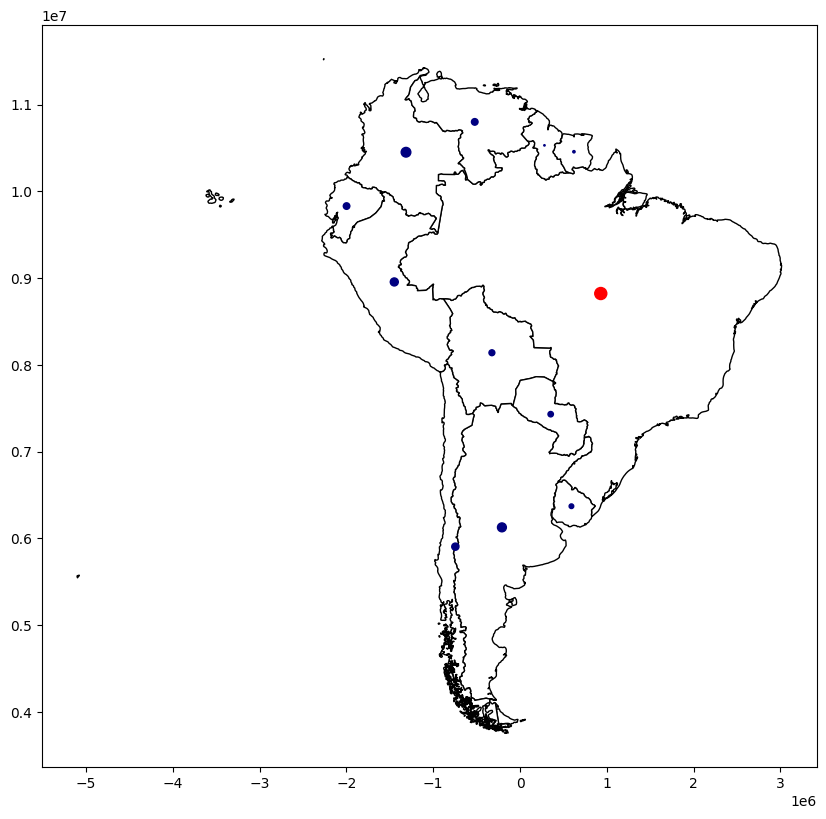

In [247]:
base = southAmerica_32721.plot(color='white', edgecolor='black', figsize=(10,10))

# Define your color map
mapcolor = {1: 'red', 0: 'navy'}

# Plot the centroids on top
southAmerica_32721_symbols.plot(
    ax=base,
    markersize=southAmerica_32721_symbols['size'],
    color=southAmerica_32721_symbols['mobiles_outlier'].map(mapcolor)
)

*Get ready to export to R*

In [236]:
southAmerica_32721_symbols.head()

,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,size,mobiles_outlier
Country,,,,,,,,,,,,
ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,POINT (-209034.328 6127726.445),40.954447,0
BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,POINT (-324431.397 8139959.317),17.960431,0
BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,POINT (930089.124 8822298.509),75.000000,1
CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,POINT (-745661.919 5905367.74),26.828323,0
COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,POINT (-1314246.797 10450352.008),48.264474,0


In [237]:
## then
southAmerica_32721_symbols.reset_index(drop=False, inplace=True)
southAmerica_32721_symbols.drop(columns=['iso2', 'region', 'fragility', 'co2', 'sq_km', 'num_airports','mobiles'], inplace=True)

## final for R:
southAmerica_32721_symbols.head()

,Country,iso3,population,geometry,size,mobiles_outlier
0,ARGENTINA,ARG,46994384,POINT (-209034.328 6127726.445),40.954447,0
1,BOLIVIA,BOL,12311974,POINT (-324431.397 8139959.317),17.960431,0
2,BRAZIL,BRA,220051512,POINT (930089.124 8822298.509),75.000000,1
3,CHILE,CHL,18664652,POINT (-745661.919 5905367.74),26.828323,0
4,COLOMBIA,COL,49588357,POINT (-1314246.797 10450352.008),48.264474,0


**Chloropleth**

<Axes: >

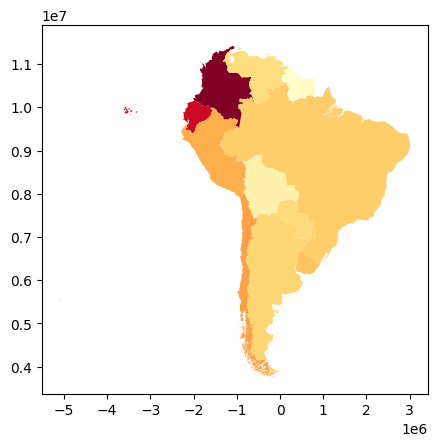

In [238]:
southAmerica_32721.plot(southAmerica_32721.mobiles/southAmerica_32721.sq_km,cmap="YlOrRd")

In [239]:
southAmerica_32721['mobiles_density']=southAmerica_32721.mobiles/southAmerica_32721.sq_km

southAmerica_32721.head()

,Country,iso2,iso3,region,fragility,co2,sq_km,num_airports,population,mobiles,geometry,mobiles_density
7,ARGENTINA,AR,ARG,SOUTH AMERICA,46.0,193205000,2780400,764,46994384,62700000,"MULTIPOLYGON (((-759270.665 5870625.155, -7560...",22.550712
18,BOLIVIA,BO,BOL,SOUTH AMERICA,72.9,17786000,1098581,201,12311974,12000000,"MULTIPOLYGON (((-42754.831 7727724.803, -49816...",10.923182
22,BRAZIL,BR,BRA,SOUTH AMERICA,71.8,456670000,8515770,5297,220051512,213000000,"MULTIPOLYGON (((-1007377.468 8868866.239, -100...",25.012418
34,CHILE,CL,CHL,SOUTH AMERICA,38.9,88333000,756102,379,18664652,26700000,"MULTIPOLYGON (((-646219.821 4147706.976, -6454...",35.312696
37,COLOMBIA,CO,COL,SOUTH AMERICA,75.7,81007000,1138910,661,49588357,87400000,"MULTIPOLYGON (((-2264333.479 11515989.067, -22...",76.740041


In [240]:
import mapclassify

# let's try 5 intervals
K=5
theVar=southAmerica_32721['mobiles_density']

# same interval width, easy interpretation
ei5 = mapclassify.EqualInterval(theVar, k=K)
# same interval width based on standard deviation, easy - but not as the previous one, poor when high skewness
msd = mapclassify.StdMean(theVar)
# interval width varies, counts per interval are close, not easy to grasp, repeated values complicate cuts
q5=mapclassify.Quantiles(theVar,k=K)

# based on similarity, good for multimodal data
mb5 = mapclassify.MaximumBreaks(theVar, k=K)
# based on similarity, good for skewed data
ht = mapclassify.HeadTailBreaks(theVar) # no K needed
# based on similarity, optimizer
fj5 = mapclassify.FisherJenks(theVar, k=K)
# based on similarity, optimizer
jc5 = mapclassify.JenksCaspall(theVar, k=K)
# based on similarity, optimizer
mp5 = mapclassify.MaxP(theVar, k=K)

In [241]:
import pandas as pd
class5 = ei5,msd, q5,mb5,  ht, fj5, jc5, mp5
# Collect ADCM for each classifier
fits = np.array([ c.adcm for c in class5])
# Convert ADCM scores to a DataFrame
adcms = pd.DataFrame(fits)
# Add classifier names
adcms['classifier'] = [c.name for c in class5]
# Add column names to the ADCM
adcms.columns = ['ADCM', 'Classifier']

<Axes: ylabel='Classifier'>

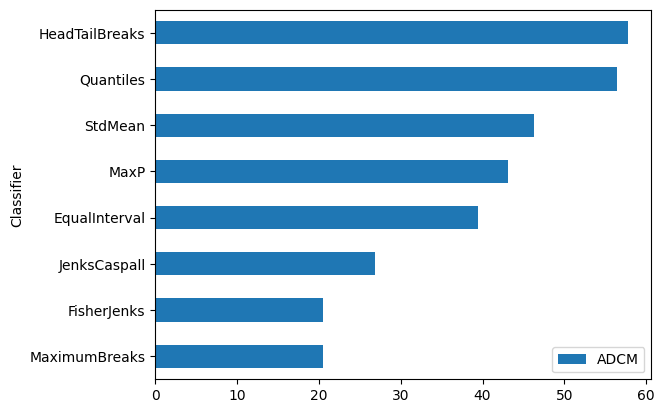

In [242]:
adcms.sort_values('ADCM').plot.barh(x='Classifier')

In [243]:
southAmerica_32721['mobiles_density_FJ5'] = fj5.yb

In [244]:
southAmerica_32721[['mobiles_density','mobiles_density_FJ5']].head(20)

,mobiles_density,mobiles_density_FJ5
7,22.550712,1
18,10.923182,0
22,25.012418,1
34,35.312696,2
37,76.740041,4
47,64.183721,3
67,3.981969,0
116,6.037114,0
119,21.315199,1
120,32.134676,2


In [245]:
# renaming
newLabelsForLevels={0:"0_VeryLow", 1:"1_Low", 2:"2_Middle", 3:"3_High", 4:"4_VeryHigh"}

southAmerica_32721['mobiles_density_FJ5_cat']=southAmerica_32721.loc[:,'mobiles_density_FJ5'].replace(newLabelsForLevels)

# we have
southAmerica_32721[['mobiles_density','mobiles_density_FJ5','mobiles_density_FJ5_cat']].head(20)

,mobiles_density,mobiles_density_FJ5,mobiles_density_FJ5_cat
7,22.550712,1,1_Low
18,10.923182,0,0_VeryLow
22,25.012418,1,1_Low
34,35.312696,2,2_Middle
37,76.740041,4,4_VeryHigh
47,64.183721,3,3_High
67,3.981969,0,0_VeryLow
116,6.037114,0,0_VeryLow
119,21.315199,1,1_Low
120,32.134676,2,2_Middle


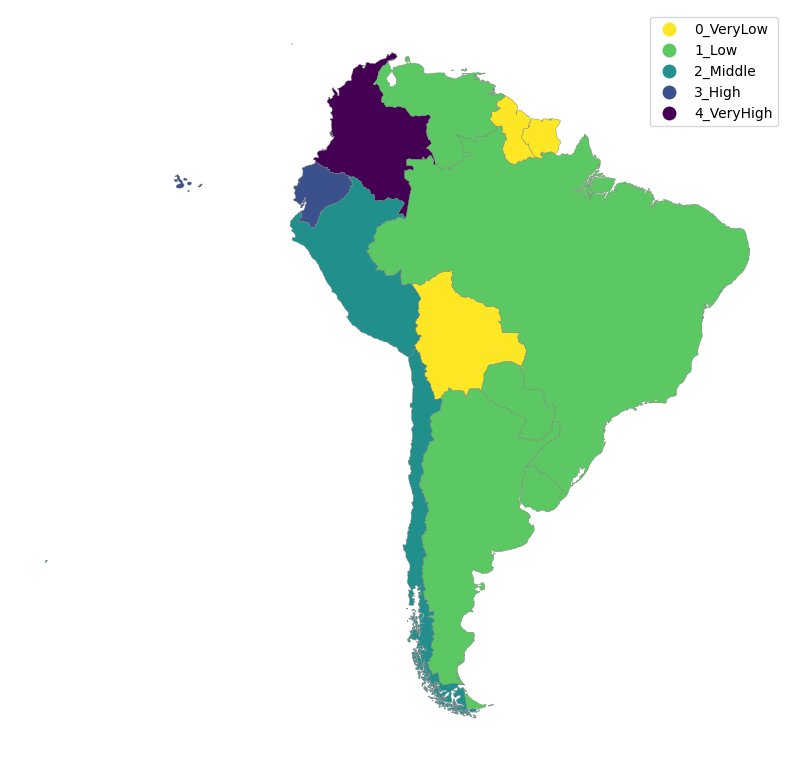

In [246]:
# discrete chloroplath

import matplotlib.pyplot as plt

f, ax = plt.subplots(1, figsize=(10, 10))
southAmerica_32721.plot(column='mobiles_density_FJ5_cat', # variable to plot
                 cmap='viridis_r', # set of colors
                 categorical=True, # can be interpreted as category
                 edgecolor='grey', # border color
                 linewidth=0.3, # width of border
                 legend=True, # need a legend?
                 ax=ax
       )

ax.set_axis_off()